# Imersão de Dados 04 - Pesquisa de Imóveis em São Paulo

# Aula 03

# Tabela de Conteúdos
1. Definição do Problema
2. Definição da Baseline
3. Planejamento da Solução
4. Coleta e Limpeza dos Dados
5. Análise Exploratória dos Dados

# 1) Definição do Problema

### 1.1) Problema de Negócio
Nós possuimos duas bases de dados não tratados, uma primária que se trata de dados referentes a imóveis da cidade de São Paulo, e um segundo dataset que consta de dados básicos retirados do IBGE relacionados ao último CENSU realizado em 2010. Nosso objetibo com estes dados é realizar uma análise completa e extrair insights interessantes relacionando o primeiro dataset sobre imóveis, com os dados provindos do segundo dataset, que dentre outras coisas, nos trás informações sobre imóveis em diversos estados e o valor do rendimento mensal da família responsável pelo respectivo imóvel.

>#### DESAFIOS:
>- Tentar vincular dados do IBGE com os dados de imóveis.
>- Tratar os outliers e comparar com os resultados.
>- Agrupar por mais de uma categoria e realizar as análises.
>- Organize o colab para deixar com cara de projeto.

### 1.2) Dicionário dos Dados
##### DATASET - IBGE
| Código da variável | Descrição do setor |
| --- | --- |
Cod_setor           | ID
Cod_Grandes_Regiões | Código das Grandes Regiões (Regiões Geográficas)
Nome_Grande_Regiao  | Nome das Grandes Regiões (Regiões Geográficas)
Cod_UF              | Código da Unidade da Federação
Nome_da_UF          | Nome da Unidade da Federação
Cod_meso            | Código da mesorregião
Nome_da_meso        | Nome da mesorregião
Cod_micro           | Código da microrregião
Nome_da_micro       | Nome da microrregião
Cod_RM              | Código da região metropolitana ou RIDE
Nome_da_RM          | Nome da região metropolitana ou RIDE
Cod_municipio       | Código do município
Nome_do_municipio   | Nome do município
Cod_distrito        | Código do distrito
Nome_do_distrito    | Nome do distrito    
Cod_subdistrito     | Código do subdistrito
Nome_do_subdistrito | Nome do subdistrito
Cod_bairro          | Código de bairro
Nome_do_bairro      | Nome do bairro
Situacao_setor      | Código de situação do setor
Tipo_setor          | Tipo ( Situação urbana / Situação rural ) 
V001                | Domicílios particulares permanentes ou pessoas responsáveis por domicílios particulares permanentes
V002                | Moradores em domicílios particulares permanentes ou população residente em domicílios particulares permanentes
V003                | Média do número de moradores em domicílios particulares permanentes (obtida pela divisão de Var2 por Var1)
V004                | Variância do número de moradores em domicílios particulares permanentes
V005                | Valor do rendimento nominal médio mensal das pessoas responsáveis por domicílios particulares permanentes (com e sem rendimento)
V006                | Variância do rendimento nominal mensal das pessoas responsáveis por domicílios particulares permanentes (com e sem rendimento)
V007                | Valor do rendimento nominal médio mensal das pessoas responsáveis por domicílios particulares permanentes (com rendimento)
V008                | Variância do rendimento nominal mensal das pessoas responsáveis por domicílios particulares permanentes (com rendimento)
V009                | Valor do rendimento nominal médio mensal das pessoas de 10 anos ou mais de idade (com e sem rendimento)
V010                | Variância do rendimento nominal mensal das pessoas de 10 anos ou mais de idade (com e sem rendimento)
V011                | Valor do rendimento nominal médio mensal das pessoas de 10 anos ou mais de idade (com rendimento)
V012                | Variância do rendimento nominal mensal das pessoas de 10 anos ou mais de idade (com rendimento)
##### DATASET - IMÓVEIS SÃO PAULO
| Código da variável | Descrição |
| --- | --- |
Rua | Localização da rua de onde o imóvel pertence
Bairro | Bairro onde imóvel está localizado
Cidade | Cidade onde imóvel está localizado
Metragem | Área em metros quadrado
Quartos | Número de quartos no imóvel
Banheiros | Número de banheiros no imóvel
Vagas |  Vagas de estacionamento por veículo
Valor | Preço da casa que está em moeda brasileira BRL

# 2) Definição da Baseline

# 3) Planejamento da Solução
### 3.1) Produto Final
Notebook contendo uma análise exploratória de dados que vincule os dados do dataset de imóveis em São Paulo com os dados do dataset IBGE, e realize sobre ele um tratamento contra outliers, valores duplicados e faça a tranfosmação apropriada nas colunas. Além disso, ter gerado análises com os dados agrupados por mais de uma categoria e ter todo o notebook no formato de projeto.
- Arquivos com estrutura de projeto
- Análises em um notebook, arquivo com extensão .ipynb
### 3.2) Tech Stack
- Python, Pandas e Numpy
- Matplotlib e Seaborn
- Jupyter Notebook e VSCode
### 3.3) Processo:
- Tentar vincular dados do IBGE com os dados de imóveis.
    1. Baixar os dados ou encontrar URL de destino para os dados do dataset do IBGE
    2. Extrair esse dataset para uma Dataframe pandas por meio da função `read_csv`
    3. Utilizar a biblioteca *chardet* para identificar o encoding do dataset IBGE
    4. Utilizar este encoding para corrigir a importação do dataset
    5. Explorar esta base de dados
    6. Identificar uma **key** para conectar os dois datasets, imoveis e IBGE (Bairro)
    7. Fazer um left merge para unir ambos datasets sem perder dados do dataset primário
    8. Verificar se o merge foi bem sucedido
    9. Tratar linhas com dados nulos e/ou duplicados ( seguinte )
- Tratar os outliers e comparar com os resultados.
    1. 
- Agrupar por mais de uma categoria e realizar as análises.
- Organize o colab para deixar com cara de projeto.

# 4) Coleta e Limpeza dos Dados 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

sns.set()

In [2]:
url = "https://gist.githubusercontent.com/tgcsantos/3bdb29eba6ce391e90df2b72205ba891/raw/22fa920e80c9fa209a9fccc8b52d74cc95d1599b/dados_imoveis.csv"

dados_imoveis = pd.read_csv( url )
dados_imoveis.head()

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000


In [3]:
dados_imoveis.shape

(10008, 8)

In [4]:
import sys
!{sys.executable} -m pip install chardet

# modulo util para codificacao de caracteres
import chardet

In [5]:
# Olhar os 10000 primeiros bytes do arquivo para deduzir o enconding dos caracteres
with open("../assets/IBGE_Basico_SP1.csv", 'rb') as rawdata:
    result = chardet.detect(rawdata.read(10000))

print(result)

{'encoding': 'utf-8', 'confidence': 0.99, 'language': ''}


In [6]:
# Importando a base de dados do IBGE
url_ibge = "../assets/IBGE_Basico_SP1.csv"

dados_ibge = pd.read_csv( url_ibge, sep=";", encoding='utf-8', thousands=".", decimal=",", engine="python" )
dados_ibge.dropna(how='all', axis=1, inplace=True)
dados_ibge.head()

,Cod_setor,Cod_Grandes Regi�es,Nome_Grande_Regiao,Cod_UF,Nome_da_UF,Cod_meso,Nome_da_meso,Cod_micro,Nome_da_micro,Cod_RM,...,V003,V004,V005,V006,V007,V008,V009,V010,V011,V012
0,355030801000001,3,Regi�o Sudeste,35,S�o Paulo,3515,Metropolitana de S�o Paulo,35061,S�o Paulo,20,...,3.01,2.32,2091.32,8532451.78,2164.55,8673276.78,1227.41,4285771.99,1713.75,5152087.86
1,355030801000002,3,Regi�o Sudeste,35,S�o Paulo,3515,Metropolitana de S�o Paulo,35061,S�o Paulo,20,...,2.98,2.09,1650.09,3983441.31,1717.44,4030519.99,1045.78,2572133.32,1468.08,2991546.94
2,355030801000003,3,Regi�o Sudeste,35,S�o Paulo,3515,Metropolitana de S�o Paulo,35061,S�o Paulo,20,...,3.31,3.08,1280.43,5474593.06,2349.53,7553913.02,902.97,2735492.52,1786.79,3837674.74
3,355030801000004,3,Regi�o Sudeste,35,S�o Paulo,3515,Metropolitana de S�o Paulo,35061,S�o Paulo,20,...,3.16,2.26,1119.59,3572955.10,1859.13,4567289.50,869.09,2122409.02,1567.41,2735383.24
4,355030801000005,3,Regi�o Sudeste,35,S�o Paulo,3515,Metropolitana de S�o Paulo,35061,S�o Paulo,20,...,3.14,2.35,1416.90,2240207.58,1581.66,2240109.39,917.71,1570047.75,1356.35,1725877.85


In [7]:
dados_ibge.shape

(18363, 33)

#### Limpando os Dados

##### dados_imoveis

In [8]:
# Criando novas colunas
df_valores = dados_imoveis["Valor"].str.split( expand=True ).rename( columns={ 0: "Valor_sinal", 1: "Valor_real", 2: "Valor_tipo"})
df_valores.head()

,Valor_sinal,Valor_real,Valor_tipo
0,R$,7.000.000,None
1,R$,3.700.000,None
2,R$,380.000,None
3,R$,685.000,None
4,R$,540.000,None


In [9]:
# Convertendo a coluna Valor_real para float
valor_real_float = df_valores["Valor_real"].str.replace( ".", "" ).astype( 'float' )
valor_real_float.dtype

/tmp/ipykernel_6012/3234832733.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  valor_real_float = df_valores["Valor_real"].str.replace( ".", "" ).astype( 'float' )


dtype('float64')

In [10]:
df_valores["Valor_real"] = valor_real_float
df_valores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10008 entries, 0 to 10007
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Valor_sinal  10008 non-null  object 
 1   Valor_real   10008 non-null  float64
 2   Valor_tipo   852 non-null    object 
dtypes: float64(1), object(2)
memory usage: 234.7+ KB


Tudo certo com essas novas colunas, agora vamos concatená-las no dataframe original.

In [11]:
dados_imoveis = pd.concat( [dados_imoveis, df_valores], axis=1 )
dados_imoveis.head()

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Valor_sinal,Valor_real,Valor_tipo
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000,R$,7000000.0,None
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000,R$,3700000.0,None
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000,R$,380000.0,None
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000,R$,685000.0,None
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000,R$,540000.0,None


In [12]:
# Removendo os dados de imóveis de locação
dados_imoveis = dados_imoveis.loc[dados_imoveis["Valor_tipo"].isna()]
dados_imoveis.drop( columns=["Valor_tipo"], axis=1, inplace=True )
dados_imoveis.head()

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Valor_sinal,Valor_real
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000,R$,7000000.0
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000,R$,3700000.0
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000,R$,380000.0
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000,R$,685000.0
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000,R$,540000.0


In [13]:
# Criando coluna Valor_m2
dados_imoveis["Valor_m2"] = dados_imoveis["Valor_real"] / dados_imoveis["Metragem"]

In [14]:
dados_imoveis.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9156 entries, 0 to 10007
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Rua          6107 non-null   object 
 1   Bairro       9146 non-null   object 
 2   Cidade       9156 non-null   object 
 3   Metragem     9156 non-null   int64  
 4   Quartos      9156 non-null   int64  
 5   Banheiros    9156 non-null   int64  
 6   Vagas        9156 non-null   int64  
 7   Valor        9156 non-null   object 
 8   Valor_sinal  9156 non-null   object 
 9   Valor_real   9156 non-null   float64
 10  Valor_m2     9156 non-null   float64
dtypes: float64(2), int64(4), object(5)
memory usage: 858.4+ KB


##### dados_ibge

In [15]:
# Checando por valores nulos
sum_nas = dados_ibge.isna().sum()
sum_nas[sum_nas > 0]

V001    30
V002    30
V003    30
V004    30
V005    30
V006    30
V007    39
V008    39
V011    11
V012    11
dtype: int64

Parece que quase todas as colunas da seçâo V0.. possuem dados nulos. Já que são apenas poucas entradas, optei por removê-las do dataset.

In [16]:
dados_ibge.shape

(18363, 33)

In [17]:
# Removendo entradas com valores nulos
dados_ibge.dropna( inplace=True )
dados_ibge.shape

(18324, 33)

In [18]:
# Checando por entradas duplicadas
dados_ibge.duplicated().any()

False

#### Imprimindo métricas de resumo

In [19]:
dados_ibge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18324 entries, 0 to 18362
Data columns (total 33 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Cod_setor            18324 non-null  int64  
 1   Cod_Grandes Regi�es  18324 non-null  int64  
 2   Nome_Grande_Regiao   18324 non-null  object 
 3   Cod_UF               18324 non-null  int64  
 4   Nome_da_UF           18324 non-null  object 
 5   Cod_meso             18324 non-null  int64  
 6   Nome_da_meso         18324 non-null  object 
 7   Cod_micro            18324 non-null  int64  
 8   Nome_da_micro        18324 non-null  object 
 9   Cod_RM               18324 non-null  int64  
 10  Nome_da_RM           18324 non-null  object 
 11  Cod_municipio        18324 non-null  int64  
 12  Nome_do_municipio    18324 non-null  object 
 13  Cod_distrito         18324 non-null  int64  
 14  Nome_do_distrito     18324 non-null  object 
 15  Cod_subdistrito      18324 non-null 

In [20]:
dados_ibge.dtypes.unique()

array([dtype('int64'), dtype('O'), dtype('float64')], dtype=object)

In [21]:
dados_ibge_numericos, dados_ibge_categoricos = dados_ibge.select_dtypes( include=['int64', 'float64'] ), dados_ibge.select_dtypes( exclude=['int64', 'float64'] )

In [22]:
dados_ibge_numericos.describe().round()

,Cod_setor,Cod_Grandes Regi�es,Cod_UF,Cod_meso,Cod_micro,Cod_RM,Cod_municipio,Cod_distrito,Cod_subdistrito,Cod_bairro,...,V003,V004,V005,V006,V007,V008,V009,V010,V011,V012
count,1.832400e+04,18324.0,18324.0,18324.0,18324.0,18324.0,18324.0,18324.0,1.832400e+04,1.832400e+04,...,18324.0,18324.0,18324.0,1.832400e+04,18324.0,1.832400e+04,18324.0,1.832400e+04,18324.0,1.832400e+04
mean,3.550308e+14,3.0,35.0,3515.0,35061.0,20.0,3550308.0,355030849.0,3.550308e+10,3.550308e+09,...,3.0,2.0,2161.0,3.097856e+07,2492.0,3.549653e+07,1414.0,1.955043e+07,2059.0,2.681660e+07
std,2.635655e+07,0.0,0.0,0.0,0.0,0.0,0.0,26.0,2.636000e+03,0.000000e+00,...,1.0,1.0,2602.0,3.020821e+08,2866.0,4.294271e+08,1510.0,1.864407e+08,2093.0,3.291565e+08
min,3.550308e+14,3.0,35.0,3515.0,35061.0,20.0,3550308.0,355030801.0,3.550308e+10,3.550308e+09,...,1.0,0.0,27.0,0.000000e+00,120.0,0.000000e+00,42.0,0.000000e+00,250.0,0.000000e+00
25%,3.550308e+14,3.0,35.0,3515.0,35061.0,20.0,3550308.0,355030827.0,3.550308e+10,3.550308e+09,...,3.0,2.0,815.0,5.352960e+05,1014.0,4.748000e+05,550.0,4.409220e+05,919.0,3.960780e+05
50%,3.550308e+14,3.0,35.0,3515.0,35061.0,20.0,3550308.0,355030846.0,3.550308e+10,3.550308e+09,...,3.0,2.0,1213.0,1.602002e+06,1436.0,1.607897e+06,818.0,1.168910e+06,1252.0,1.259894e+06
75%,3.550309e+14,3.0,35.0,3515.0,35061.0,20.0,3550308.0,355030872.0,3.550309e+10,3.550308e+09,...,3.0,3.0,2414.0,7.025526e+06,2736.0,7.183472e+06,1621.0,5.074929e+06,2274.0,5.588548e+06
max,3.550309e+14,3.0,35.0,3515.0,35061.0,20.0,3550308.0,355030896.0,3.550309e+10,3.550308e+09,...,8.0,33.0,73312.0,1.943668e+10,78200.0,3.546862e+10,30826.0,1.310897e+10,47560.0,2.864207e+10


In [23]:
dados_ibge_categoricos.describe()

,Nome_Grande_Regiao,Nome_da_UF,Nome_da_meso,Nome_da_micro,Nome_da_RM,Nome_do_municipio,Nome_do_distrito,Nome_do_subdistrito,Nome_do_bairro
count,18324,18324,18324,18324,18324,18324,18324,18324,18324
unique,1,1,1,1,1,1,96,96,1
top,Regi�o Sudeste,S�o Paulo,Metropolitana de S�o Paulo,S�o Paulo,RM S�o Paulo,S�O PAULO,GRAJA�,GRAJA�,S�O PAULO (todos os setores)
freq,18324,18324,18324,18324,18324,18324,605,605,18324


# 5) Análise Exploratória dos Dados

## [DESAFIO 1] Tentar vincular dados do IBGE com os dados de imóveis.

In [24]:
dados_ibge.T.head( dados_ibge.shape[0] )

,0,1,2,3,4,5,6,7,8,9,...,18353,18354,18355,18356,18357,18358,18359,18360,18361,18362
Cod_setor,355030801000001,355030801000002,355030801000003,355030801000004,355030801000005,355030801000006,355030801000007,355030801000008,355030801000009,355030801000010,...,355030896000238,355030896000239,355030896000240,355030896000241,355030896000242,355030896000243,355030896000244,355030896000245,355030896000246,355030896000247
Cod_Grandes Regi�es,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
Nome_Grande_Regiao,Regi�o Sudeste,Regi�o Sudeste,Regi�o Sudeste,Regi�o Sudeste,Regi�o Sudeste,Regi�o Sudeste,Regi�o Sudeste,Regi�o Sudeste,Regi�o Sudeste,Regi�o Sudeste,...,Regi�o Sudeste,Regi�o Sudeste,Regi�o Sudeste,Regi�o Sudeste,Regi�o Sudeste,Regi�o Sudeste,Regi�o Sudeste,Regi�o Sudeste,Regi�o Sudeste,Regi�o Sudeste
Cod_UF,35,35,35,35,35,35,35,35,35,35,...,35,35,35,35,35,35,35,35,35,35
Nome_da_UF,S�o Paulo,S�o Paulo,S�o Paulo,S�o Paulo,S�o Paulo,S�o Paulo,S�o Paulo,S�o Paulo,S�o Paulo,S�o Paulo,...,S�o Paulo,S�o Paulo,S�o Paulo,S�o Paulo,S�o Paulo,S�o Paulo,S�o Paulo,S�o Paulo,S�o Paulo,S�o Paulo
Cod_meso,3515,3515,3515,3515,3515,3515,3515,3515,3515,3515,...,3515,3515,3515,3515,3515,3515,3515,3515,3515,3515
Nome_da_meso,Metropolitana de S�o Paulo,Metropolitana de S�o Paulo,Metropolitana de S�o Paulo,Metropolitana de S�o Paulo,Metropolitana de S�o Paulo,Metropolitana de S�o Paulo,Metropolitana de S�o Paulo,Metropolitana de S�o Paulo,Metropolitana de S�o Paulo,Metropolitana de S�o Paulo,...,Metropolitana de S�o Paulo,Metropolitana de S�o Paulo,Metropolitana de S�o Paulo,Metropolitana de S�o Paulo,Metropolitana de S�o Paulo,Metropolitana de S�o Paulo,Metropolitana de S�o Paulo,Metropolitana de S�o Paulo,Metropolitana de S�o Paulo,Metropolitana de S�o Paulo
Cod_micro,35061,35061,35061,35061,35061,35061,35061,35061,35061,35061,...,35061,35061,35061,35061,35061,35061,35061,35061,35061,35061
Nome_da_micro,S�o Paulo,S�o Paulo,S�o Paulo,S�o Paulo,S�o Paulo,S�o Paulo,S�o Paulo,S�o Paulo,S�o Paulo,S�o Paulo,...,S�o Paulo,S�o Paulo,S�o Paulo,S�o Paulo,S�o Paulo,S�o Paulo,S�o Paulo,S�o Paulo,S�o Paulo,S�o Paulo
Cod_RM,20,20,20,20,20,20,20,20,20,20,...,20,20,20,20,20,20,20,20,20,20


Nota-se que o dataframe `dados_ibge` não possui uma variável que sirva como *key* para a realização do merge entre ele e o dataframe `dados_imoveis`. Uma key seria uma coluna que, independente do nome, compartilha dos mesmos valores do outro dataframe. Portanto, devemos elaborar outras formas para realizar esta junção, temos os seguintes cenários como solução: um, utilizar outros datasets como intermediários para fazer a conexão entre ambos dataframes, dois, tentar conectar ambos os dataframes por meio do bairro, isso deixaria o dataframe resultante um pouco genérico, já que não garante que os respectivos dados de cada dataset seja realmente referente a sua contra-parte do outro dataframe, resultando em um merge cheio de valores errôneos e possivelmente gerando análises equivocadas.

### Realizando MERGE através do Bairro

In [25]:
copy_dados_ibge = dados_ibge.copy()
copy_dados_imoveis = dados_imoveis.copy()

In [26]:
# Indentificando a variável que possui os valores dos bairros
dados_ibge_nunique = copy_dados_ibge.nunique()
dados_ibge_nunique[dados_ibge_nunique > 1]

Cod_setor              18324
Cod_distrito              96
Nome_do_distrito          96
Cod_subdistrito           96
Nome_do_subdistrito       96
Situacao_setor             6
Tipo_setor                 5
V001                     590
V002                    1626
V003                     368
V004                     650
V005                   17637
V006                   18272
V007                   17625
V008                   18245
V009                   17335
V010                   18316
V011                   17514
V012                   18289
dtype: int64

In [27]:
# Verificando se ambas essas possuem valores indenticados
copy_dados_ibge['Nome_do_distrito'].equals(copy_dados_ibge['Nome_do_subdistrito'])

True

A variável encontrada foi `Nome_do_distrito`. Utilizaremos esta coluna para obter os nomes dos bairros do dataset `dados_ibge` para fazer o merge com o dataframe de vendas.

In [28]:
# Valores únicos para bairros do dataframe `dados_ibge`
nomes_bairros_ibge = copy_dados_ibge['Nome_do_distrito'].unique()
nomes_bairros_ibge

array(['�GUA RASA', 'ALTO DE PINHEIROS', 'ANHANGUERA', 'ARICANDUVA',
       'ARTUR ALVIM', 'BARRA FUNDA', 'BELA VISTA', 'BEL�M', 'BOM RETIRO',
       'BR�S', 'BRASIL�NDIA', 'BUTANT�', 'CACHOEIRINHA', 'CAMBUCI',
       'CAMPO BELO', 'CAMPO GRANDE', 'CAMPO LIMPO', 'CANGAIBA',
       'CAP�O REDONDO', 'CARR�O', 'CASA VERDE', 'CIDADE ADEMAR',
       'CIDADE DUTRA', 'CIDADE LIDER', 'CIDADE TIRADENTES', 'CONSOLA��O',
       'CURSINO', 'ERMELINO MATARAZZO', 'FREGUESIA DO �', 'GRAJA�',
       'GUAIANASES', 'MOEMA', 'IGUATEMI', 'IPIRANGA', 'ITAIM BIBI',
       'ITAIM PAULISTA', 'ITAQUERA', 'JABAQUARA', 'JA�AN�', 'JAGUARA',
       'JAGUAR�', 'JARAGU�', 'JARDIM �NGELA', 'JARDIM HELENA',
       'JARDIM PAULISTA', 'JARDIM S�O LU�S', 'JOS� BONIF�CIO', 'LAPA',
       'LIBERDADE', 'LIM�O', 'MANDAQUI', 'MARSILAC', 'MOOCA', 'MORUMBI',
       'PARELHEIROS', 'PARI', 'PARQUE DO CARMO', 'PEDREIRA', 'PENHA',
       'PERDIZES', 'PERUS', 'PINHEIROS', 'PIRITUBA', 'PONTE RASA',
       'RAPOSO TAVARES', 'REP�BLICA

In [29]:
# Valores únicos para bairros do dataframe `dados_imoveis`
nomes_bairros_imoveis = copy_dados_imoveis['Bairro'].unique()
nomes_bairros_imoveis

array(['Planalto Paulista', 'Jardim dos Estados', 'Jardim Reimberg',
       'Jardim Morumbi', 'Mooca', 'Santo Amaro', 'Cidade Mãe do Céu',
       'Jardim Vergueiro', 'Jardim Benfica', 'Vila Alpina',
       'Vila Monumento', 'Jardim Luzitânia', 'Vila Uberabinha',
       'Jardim Prudência', 'Lauzane Paulista', 'Jardim Santa Maria',
       'Vila Nova', 'Itaberaba', 'Vila Nova Conceição', 'Jardim da Saúde',
       'Jardim Santo Antônio', 'Vila Mazzei', 'Vila Madalena',
       'Jardim Ivana', 'Vila Campo Grande', 'Vila Gomes Cardim',
       'Bela Aliança', 'Vila Albertina', 'Cidade Jardim',
       'Parque da Lapa', 'Vila Libanesa', 'Cidade Domitila',
       'Vila Nova Savoia', 'Jardim Maria Estela', 'Parque São Rafael',
       'Vila Bandeirantes', 'Parque Colonial', 'Vila Califórnia',
       'Jardim das Imbuias', 'Vila Tramontano', 'Vila Nancy',
       'Parada Inglesa', 'Jardim Leonor Mendes de Barros', 'Jardim Iva',
       'Jardim Amália', 'Vila dos Remédios', 'Brooklin Paulista',
       '

Ambas `Series` possuem valores formatados distintamente, uma possui valores *uppercase* e com caracteres desconhecidos que precisam ser inseridos, a outra `Series` está em *lowercase* capitalizado. Precisamos deixar ambas formatadas da mesma forma para fazer a seleção dos valores iguais.

Eu vou utilizar o pacote **fuzzywuzzy** para ajudar a identificar quais strings estão mais próximas umas das outras.

In [30]:
copy_dados_ibge["Nome_do_distrito"] = copy_dados_ibge["Nome_do_distrito"].str.lower().str.title()
nomes_bairros_ibge = copy_dados_ibge["Nome_do_distrito"].unique()

In [31]:
!!{sys.executable} -m pip install fuzzywuzzy

from fuzzywuzzy import fuzz
from fuzzywuzzy import process

/home/gustavos/.conda/envs/imersao_dados_04/lib/python3.10/site-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [32]:
# Exemplo the funcionamento do matching de Strings semelhantes
# Nota-se que a primeira linha, tem um indice de 94% de semelhança entre as duas Śtrings
matches = process.extract("Consola��O", nomes_bairros_imoveis, limit=3, scorer=fuzz.token_sort_ratio)

matches

[('Consolação', 94), ('Vila Constança', 55), ('Rio Bonito', 53)]

In [33]:
def substitue_nomes_de_bairros_com_erros( df, target_column, series_reference, min_ratio=85 ):
    subset_df = df.loc[df[target_column].str.contains('�')]
    velhos_nomes = subset_df[target_column].unique()

    dict_bairros = {}

    for i, bairro in enumerate(velhos_nomes):
        matches = process.extract(bairro, series_reference, limit=3, scorer=fuzz.token_sort_ratio)
        match = matches[0]
        if match[1] >= min_ratio:
            dict_bairros[bairro] = [match[0], True]
        else:
            dict_bairros[bairro] = [match[0], False]

    return dict_bairros

In [34]:
dict_nomes_corrigidos = substitue_nomes_de_bairros_com_erros( df=copy_dados_ibge, target_column="Nome_do_distrito", series_reference=nomes_bairros_imoveis )
dict_nomes_corrigidos

{'�Gua Rasa': ['Água Rasa', True],
 'Bel�M': ['Campo Belo', False],
 'Br�S': ['Brás', True],
 'Brasil�Ndia': ['Brasilândia', True],
 'Butant�': ['Butantã', True],
 'Cap�O Redondo': ['Capão Redondo', True],
 'Carr�O': ['Vila Carrão', False],
 'Consola��O': ['Consolação', True],
 'Freguesia Do �': ['Vila dos Remédios', False],
 'Graja�': ['Água Rasa', False],
 'Ja�An�': ['Jardim Ivana', False],
 'Jaguar�': ['Jaguaré', True],
 'Jaragu�': ['Jaraguá', True],
 'Jardim �Ngela': ['Jardim Leila', False],
 'Jardim S�O Lu�S': ['Jardim São Luís', True],
 'Jos� Bonif�Cio': ['Rio Bonito', False],
 'Lim�O': ['Aclimação', False],
 'Rep�Blica': ['Jardim Bélgica', False],
 'Sacom�': ['Sacomã', True],
 'Santa Cec�Lia': ['Santa Cecília', True],
 'S�O Lucas': ['São Lucas', False],
 'S�O Mateus': ['Cidade São Mateus', False],
 'S�O Miguel': ['São Miguel Paulista', False],
 'S�O Rafael': ['Parque São Rafael', False],
 'Sa�De': ['Bela Vista', False],
 'S�': ['Brás', False],
 'Tatuap�': ['Tatuapé', True],
 'Tr

In [35]:
dict_nomes_corrigidos_manual = {
    '�Gua Rasa': ['Água Rasa', True],
    'Bel�M': ['Belém', True],
    'Carr�O': ['Vila Carrão', True], 
    'Freguesia Do �': ['Freguesia do Ó', True], 
    'Graja�': ['Grajaú', True],
    'Ja�An�': ['Jaçanã', True],
    'Jardim �Ngela': ['Jardim Ângela', True], 
    'Jos� Bonif�Cio': ['Conjunto Residencial José Bonifácio', True],
    'Lim�O': ['Limão', True], 
    'Rep�Blica': ['República', True],
    'S�O Lucas': ['São Lucas', True],
    'S�O Mateus': ['Cidade São Mateus', True],
    'S�O Miguel': ['São Miguel Paulista', True],
    'S�O Rafael': ['Parque São Rafael', True],
    'Sa�De': ['Saúde', True],
    'S�': ['Sá', True], 
    'Vila S�Nia': ['Vila Sônia', True],
    'S�O Domingos': ['Vila São Domingos', True],
}

for dict_key, dict_elem in dict_nomes_corrigidos_manual.items():
    dict_nomes_corrigidos[dict_key] = dict_elem

dict_nomes_corrigidos

{'�Gua Rasa': ['Água Rasa', True],
 'Bel�M': ['Belém', True],
 'Br�S': ['Brás', True],
 'Brasil�Ndia': ['Brasilândia', True],
 'Butant�': ['Butantã', True],
 'Cap�O Redondo': ['Capão Redondo', True],
 'Carr�O': ['Vila Carrão', True],
 'Consola��O': ['Consolação', True],
 'Freguesia Do �': ['Freguesia do Ó', True],
 'Graja�': ['Grajaú', True],
 'Ja�An�': ['Jaçanã', True],
 'Jaguar�': ['Jaguaré', True],
 'Jaragu�': ['Jaraguá', True],
 'Jardim �Ngela': ['Jardim Ângela', True],
 'Jardim S�O Lu�S': ['Jardim São Luís', True],
 'Jos� Bonif�Cio': ['Conjunto Residencial José Bonifácio', True],
 'Lim�O': ['Limão', True],
 'Rep�Blica': ['República', True],
 'Sacom�': ['Sacomã', True],
 'Santa Cec�Lia': ['Santa Cecília', True],
 'S�O Lucas': ['São Lucas', True],
 'S�O Mateus': ['Cidade São Mateus', True],
 'S�O Miguel': ['São Miguel Paulista', True],
 'S�O Rafael': ['Parque São Rafael', True],
 'Sa�De': ['Saúde', True],
 'S�': ['Sá', True],
 'Tatuap�': ['Tatuapé', True],
 'Trememb�': ['Tremembé', 

In [36]:
# Substituindo bairros com erros de codificação por valores corretos
for bairro, value in dict_nomes_corrigidos.items():
    if value[1]:
        copy_dados_ibge.loc[copy_dados_ibge["Nome_do_distrito"] == bairro, 'Nome_do_distrito'] = value[0]

# Checando funcionamento
copy_dados_ibge.loc[copy_dados_ibge["Nome_do_distrito"].str.contains('�')]["Nome_do_distrito"].nunique()

0

Agora todos os nomes de bairros da coluna `Nome_do_distrito` do dataframe `dados_ibge` estão propriamente formatados e prontos para o merge. O mere será executado sobre esta mesma coluna `Nome_do_distrito`.

In [37]:
copy_dados_ibge.drop( columns=['Cod_Grandes Regi�es', 'Nome_Grande_Regiao', 'Cod_UF', 'Nome_da_UF ', 'Cod_meso', 'Nome_da_meso', 'Cod_micro', 
'Nome_da_micro', 'Cod_RM', 'Nome_da_RM', 'Cod_municipio', 'Nome_do_municipio', 'Cod_distrito', 'Cod_subdistrito', 'Nome_do_subdistrito', 'Cod_bairro', 'Nome_do_bairro'], axis=1, inplace=True )
copy_dados_ibge.columns

Index(['Cod_setor', 'Nome_do_distrito', 'Situacao_setor', 'Tipo_setor', 'V001',
       'V002', 'V003', 'V004', 'V005', 'V006', 'V007', 'V008', 'V009', 'V010',
       'V011', 'V012'],
      dtype='object')

In [38]:
# Executando o merge entre `dados_imoveis` e `dados_ibge`, left_on='Bairro', right_on='Nome_do_distrito'.
dados_vendas_censo_bairro = copy_dados_imoveis.merge( copy_dados_ibge, left_on='Bairro', right_on='Nome_do_distrito', how='inner' ).drop_duplicates( subset=copy_dados_imoveis.columns ).reset_index()

In [39]:
# Resultado do merge entre 'dados_imoveis' e 'dados_ibge' pelo bairro
dados_vendas_censo_bairro.head(10)

,index,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Valor_sinal,...,V003,V004,V005,V006,V007,V008,V009,V010,V011,V012
0,0,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000,R$,...,3.3,2.24,2197.44,6690242.53,2343.94,6793646.01,1490.0,4602284.67,1893.07,5085711.93
1,132,Rua Timbó,Mooca,São Paulo,170,3,2,2,R$ 940.000,R$,...,3.3,2.24,2197.44,6690242.53,2343.94,6793646.01,1490.0,4602284.67,1893.07,5085711.93
2,264,NaN,Mooca,São Paulo,80,2,2,4,R$ 870.000,R$,...,3.3,2.24,2197.44,6690242.53,2343.94,6793646.01,1490.0,4602284.67,1893.07,5085711.93
3,396,Rua Manuel Galvão,Mooca,São Paulo,106,3,3,2,R$ 450.000,R$,...,3.3,2.24,2197.44,6690242.53,2343.94,6793646.01,1490.0,4602284.67,1893.07,5085711.93
4,528,"Rua Timbó, 130",Mooca,São Paulo,170,3,1,2,R$ 1.000.000,R$,...,3.3,2.24,2197.44,6690242.53,2343.94,6793646.01,1490.0,4602284.67,1893.07,5085711.93
5,660,Rua Manuel Galvão,Mooca,São Paulo,111,3,3,2,R$ 450.000,R$,...,3.3,2.24,2197.44,6690242.53,2343.94,6793646.01,1490.0,4602284.67,1893.07,5085711.93
6,792,Rua dos Pássaros,Mooca,São Paulo,117,3,3,3,R$ 1.277.000,R$,...,3.3,2.24,2197.44,6690242.53,2343.94,6793646.01,1490.0,4602284.67,1893.07,5085711.93
7,924,Rua Padre Raposo,Mooca,São Paulo,135,2,3,2,R$ 692.000,R$,...,3.3,2.24,2197.44,6690242.53,2343.94,6793646.01,1490.0,4602284.67,1893.07,5085711.93
8,1056,NaN,Mooca,São Paulo,101,2,2,5,R$ 640.000,R$,...,3.3,2.24,2197.44,6690242.53,2343.94,6793646.01,1490.0,4602284.67,1893.07,5085711.93
9,1188,NaN,Mooca,São Paulo,106,2,2,5,R$ 640.000,R$,...,3.3,2.24,2197.44,6690242.53,2343.94,6793646.01,1490.0,4602284.67,1893.07,5085711.93


In [40]:
dados_vendas_censo_bairro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1732 entries, 0 to 1731
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   index             1732 non-null   int64  
 1   Rua               1209 non-null   object 
 2   Bairro            1732 non-null   object 
 3   Cidade            1732 non-null   object 
 4   Metragem          1732 non-null   int64  
 5   Quartos           1732 non-null   int64  
 6   Banheiros         1732 non-null   int64  
 7   Vagas             1732 non-null   int64  
 8   Valor             1732 non-null   object 
 9   Valor_sinal       1732 non-null   object 
 10  Valor_real        1732 non-null   float64
 11  Valor_m2          1732 non-null   float64
 12  Cod_setor         1732 non-null   int64  
 13  Nome_do_distrito  1732 non-null   object 
 14  Situacao_setor    1732 non-null   int64  
 15  Tipo_setor        1732 non-null   int64  
 16  V001              1732 non-null   float64


Podemos notar que esta abordagem possui vários pontos fracos, dentre eles:
* Apenas 1732 imóveis foram mantidos dos 10000 originais do dataset 'dados_imoveis'
* Outra coisa é que, os dados referentes as colunas do dataset 'dados_ibge' foram repetidas para todas as linhas que tiverem o mesmo bairro, generalizando muito os nossos valores.

### Realizando MERGE através da RUA

In [41]:
copy_dados_imoveis = dados_imoveis.copy()
copy_dados_ibge = dados_ibge.copy()

In [42]:
copy_dados_imoveis.head()

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Valor_sinal,Valor_real,Valor_m2
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000,R$,7000000.0,7000.000000
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000,R$,3700000.0,7459.677419
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000,R$,380000.0,3040.000000
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000,R$,685000.0,2209.677419
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000,R$,540000.0,5400.000000


In [43]:
copy_dados_ibge.head()

,Cod_setor,Cod_Grandes Regi�es,Nome_Grande_Regiao,Cod_UF,Nome_da_UF,Cod_meso,Nome_da_meso,Cod_micro,Nome_da_micro,Cod_RM,...,V003,V004,V005,V006,V007,V008,V009,V010,V011,V012
0,355030801000001,3,Regi�o Sudeste,35,S�o Paulo,3515,Metropolitana de S�o Paulo,35061,S�o Paulo,20,...,3.01,2.32,2091.32,8532451.78,2164.55,8673276.78,1227.41,4285771.99,1713.75,5152087.86
1,355030801000002,3,Regi�o Sudeste,35,S�o Paulo,3515,Metropolitana de S�o Paulo,35061,S�o Paulo,20,...,2.98,2.09,1650.09,3983441.31,1717.44,4030519.99,1045.78,2572133.32,1468.08,2991546.94
2,355030801000003,3,Regi�o Sudeste,35,S�o Paulo,3515,Metropolitana de S�o Paulo,35061,S�o Paulo,20,...,3.31,3.08,1280.43,5474593.06,2349.53,7553913.02,902.97,2735492.52,1786.79,3837674.74
3,355030801000004,3,Regi�o Sudeste,35,S�o Paulo,3515,Metropolitana de S�o Paulo,35061,S�o Paulo,20,...,3.16,2.26,1119.59,3572955.10,1859.13,4567289.50,869.09,2122409.02,1567.41,2735383.24
4,355030801000005,3,Regi�o Sudeste,35,S�o Paulo,3515,Metropolitana de S�o Paulo,35061,S�o Paulo,20,...,3.14,2.35,1416.90,2240207.58,1581.66,2240109.39,917.71,1570047.75,1356.35,1725877.85


In [44]:
enderecos = pd.read_csv("../assets/enderecos.csv")
enderecos.head()

/tmp/ipykernel_6012/3365894247.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  enderecos = pd.read_csv("../assets/enderecos.csv")


,tipo_logr,logr_nome,logr_compl,numero,bairro,nome_localidade,sigla_uf,cep,latitude,longitude
0,Rua,Armando Silveira,Rua Armando Silveira,NaN,Divisa,Santana do Livramento,RS,97573200.0,-30.882674,-55.548830
1,Rua,João Antônio Vasconcelos,Rua João Antônio Vasconcelos - até 627/628,627,Amizade,Araçatuba,SP,16074320.0,-21.190276,-50.448686
2,Rua,Prefeito Agenor Barcelos Feio,Rua Prefeito Agenor Barcelos Feio,NaN,Registro,Santana do Livramento,RS,97571090.0,-30.855721,-55.555757
3,Rua,Sebastião Gomes,Rua Sebastião Gomes - até 59/60,59,Registro,Santana do Livramento,RS,97571374.0,-30.863149,-55.552083
4,Rua,Marquês do Alegrete,Rua Marquês do Alegrete,NaN,Parque das Águas,Santana do Livramento,RS,97571500.0,-30.864415,-55.545860


In [45]:
# Obtendo apenas os enderecos de sp
enderecos_sp = enderecos.loc[enderecos["sigla_uf"] == "SP"]
enderecos_sp.head()

,tipo_logr,logr_nome,logr_compl,numero,bairro,nome_localidade,sigla_uf,cep,latitude,longitude
1,Rua,João Antônio Vasconcelos,Rua João Antônio Vasconcelos - até 627/628,627,Amizade,Araçatuba,SP,16074320.0,-21.190276,-50.448686
413269,Rua,A,Rua A,NaN,Jardim Glória,Americana,SP,13468220.0,-22.756531,-47.343738
413270,Rua,A,Rua A,NaN,Jardim São Roque,Americana,SP,13469414.0,-22.743734,-47.348631
413271,Rua,A,Rua A,NaN,Iate Clube de Campinas,Americana,SP,13475620.0,-22.737846,-47.333569
413272,Rua,João Bandini,Rua João Bandini,NaN,Jardim Miriam,Americana,SP,13469072.0,-22.744283,-47.351588


In [46]:
# Criando uma nova coluna contendo o nome da rua
enderecos_sp["rua"] = enderecos_sp['tipo_logr'] + " " + enderecos_sp['logr_nome']
enderecos_sp["rua"] = enderecos_sp["rua"].str.lower().str.strip()
enderecos_sp.head()

/tmp/ipykernel_6012/636504549.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  enderecos_sp["rua"] = enderecos_sp['tipo_logr'] + " " + enderecos_sp['logr_nome']
/tmp/ipykernel_6012/636504549.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  enderecos_sp["rua"] = enderecos_sp["rua"].str.lower().str.strip()


,tipo_logr,logr_nome,logr_compl,numero,bairro,nome_localidade,sigla_uf,cep,latitude,longitude,rua
1,Rua,João Antônio Vasconcelos,Rua João Antônio Vasconcelos - até 627/628,627,Amizade,Araçatuba,SP,16074320.0,-21.190276,-50.448686,rua joão antônio vasconcelos
413269,Rua,A,Rua A,NaN,Jardim Glória,Americana,SP,13468220.0,-22.756531,-47.343738,rua a
413270,Rua,A,Rua A,NaN,Jardim São Roque,Americana,SP,13469414.0,-22.743734,-47.348631,rua a
413271,Rua,A,Rua A,NaN,Iate Clube de Campinas,Americana,SP,13475620.0,-22.737846,-47.333569,rua a
413272,Rua,João Bandini,Rua João Bandini,NaN,Jardim Miriam,Americana,SP,13469072.0,-22.744283,-47.351588,rua joão bandini


In [47]:
# Extraindo o nome da rua sem o número da casa da coluna 'Rua' do dataframe 'dados_imoveis'
copy_dados_imoveis["Rua"].str.extract(r'(^[\w ]+)')[:10]

,0
0,Avenida Itacira
1,Rua Aurelia Perez Alvarez
2,Rua Alba Valdez
3,NaN
4,Rua Tobias Barreto
5,Rua Graham Bell
6,Rua Francisco Paulo
7,Rua Guilherme Valente
8,Rua Sagrada Família
9,Rua Tapaji


In [48]:
# Criando e formatando a coluna apenas_rua para servir como key na realização
# do merge com o dataframe 'enderecos_sp'
copy_dados_imoveis["apenas_rua"] = copy_dados_imoveis["Rua"].str.extract(r'(^[\w ]+)')
copy_dados_imoveis["apenas_rua"] = copy_dados_imoveis["apenas_rua"].str.lower().str.strip()
copy_dados_imoveis.head()

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Valor_sinal,Valor_real,Valor_m2,apenas_rua
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000,R$,7000000.0,7000.000000,avenida itacira
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000,R$,3700000.0,7459.677419,rua aurelia perez alvarez
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000,R$,380000.0,3040.000000,rua alba valdez
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000,R$,685000.0,2209.677419,NaN
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000,R$,540000.0,5400.000000,rua tobias barreto


In [49]:
# Fazendo mergeg entre 'dados_imoveis' e 'enderecos_sp' por meio da key rua
dados_geo = copy_dados_imoveis.merge( enderecos_sp[["rua", "cep", "latitude", "longitude"]], how='left', left_on='apenas_rua', right_on='rua' ) \
    .drop_duplicates(subset=copy_dados_imoveis.columns).query("cep > 0").reset_index( drop=True)

In [50]:
dados_geo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8520 entries, 0 to 8519
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Rua          5639 non-null   object 
 1   Bairro       8512 non-null   object 
 2   Cidade       8520 non-null   object 
 3   Metragem     8520 non-null   int64  
 4   Quartos      8520 non-null   int64  
 5   Banheiros    8520 non-null   int64  
 6   Vagas        8520 non-null   int64  
 7   Valor        8520 non-null   object 
 8   Valor_sinal  8520 non-null   object 
 9   Valor_real   8520 non-null   float64
 10  Valor_m2     8520 non-null   float64
 11  apenas_rua   5639 non-null   object 
 12  rua          5639 non-null   object 
 13  cep          8520 non-null   float64
 14  latitude     8520 non-null   float64
 15  longitude    8520 non-null   float64
dtypes: float64(5), int64(4), object(7)
memory usage: 1.0+ MB


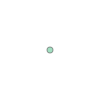

In [51]:
from shapely.geometry import Point
latitude = -23.56 	
longitude = -46.59
Point(longitude, latitude)

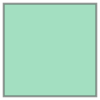

In [52]:
from shapely.geometry import Polygon
Polygon([[0, 0], [1, 0], [1, 1], [0, 1], [0, 0]])

In [53]:
setor_censo = gpd.read_file(
'../assets/35SEE250GC_SIR.shp'
)
setor_censo.head()

,ID,CD_GEOCODI,TIPO,CD_GEOCODS,NM_SUBDIST,CD_GEOCODD,NM_DISTRIT,CD_GEOCODM,NM_MUNICIP,NM_MICRO,NM_MESO,CD_GEOCODB,NM_BAIRRO,ID1,geometry
0,98237.0,354100005000009,URBANO,35410000500,None,354100005,PRAIA GRANDE,3541000,PRAIA GRANDE,SANTOS,METROPOLITANA DE SÃO PAULO,354100005001,Boqueirão,1,"POLYGON ((-46.41024 -24.01103, -46.41169 -24.0..."
1,98232.0,354100005000004,URBANO,35410000500,None,354100005,PRAIA GRANDE,3541000,PRAIA GRANDE,SANTOS,METROPOLITANA DE SÃO PAULO,354100005001,Boqueirão,2,"POLYGON ((-46.41606 -24.00245, -46.41598 -24.0..."
2,98230.0,354100005000002,URBANO,35410000500,None,354100005,PRAIA GRANDE,3541000,PRAIA GRANDE,SANTOS,METROPOLITANA DE SÃO PAULO,354100005001,Boqueirão,3,"POLYGON ((-46.41213 -24.00792, -46.41244 -24.0..."
3,98229.0,354100005000001,URBANO,35410000500,None,354100005,PRAIA GRANDE,3541000,PRAIA GRANDE,SANTOS,METROPOLITANA DE SÃO PAULO,354100005001,Boqueirão,4,"POLYGON ((-46.41134 -24.00552, -46.41196 -24.0..."
4,98231.0,354100005000003,URBANO,35410000500,None,354100005,PRAIA GRANDE,3541000,PRAIA GRANDE,SANTOS,METROPOLITANA DE SÃO PAULO,354100005001,Boqueirão,5,"POLYGON ((-46.41326 -24.00514, -46.41484 -24.0..."


In [56]:
setor_censo_sp = setor_censo[setor_censo["NM_MUNICIP"] == "SÃO PAULO"]
setor_censo_sp[setor_censo_sp.contains(Point(-46.63, -23.58))]

,ID,CD_GEOCODI,TIPO,CD_GEOCODS,NM_SUBDIST,CD_GEOCODD,NM_DISTRIT,CD_GEOCODM,NM_MUNICIP,NM_MICRO,NM_MESO,CD_GEOCODB,NM_BAIRRO,ID1,geometry
60986,126568.0,355030890000080,URBANO,35503089000,None,355030890,VILA MARIANA,3550308,SÃO PAULO,SÃO PAULO,METROPOLITANA DE SÃO PAULO,None,None,60987,"POLYGON ((-46.62618 -23.58169, -46.62863 -23.5..."


In [55]:
dados_geo["Point"] = ""
for i in dados_geo.index:
    dados_geo["Point"][i] = Point(dados_geo["longitude"][i], dados_geo["latitude"][i])

dados_geo['setor_censo'] = dados_geo["Point"].map(
    lambda x: setor_censo_sp.loc[setor_censo_sp.contains(x), 'CD_GEOCODI'].values
).str[0]
dados_geo

/tmp/ipykernel_6012/3578291950.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_geo["Point"][i] = Point(dados_geo["longitude"][i], dados_geo["latitude"][i])


KeyboardInterrupt: 

In [ ]:
# Minha implementação da solução da aula apresentou 8513 valores nulos
dados_geo[~dados_geo["setor_censo"].isna()].shape

(3897, 18)

In [ ]:
# Melhor utilizar database disponibilizado por ele com os erros corrigidos
dados_geo = pd.read_csv("../assets/dados_geo.csv")
dados_geo.head()

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Valor_anuncio,Tipo_anuncio,Valor_mm,Valor_m2,rua,cep,latitude,longitude,Point,setor_censo
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000,7000000.00,NaN,7.00,7000.00,Avenida Itacira,4061000.00,-23.62,-46.65,POINT (-46.6481622 -23.6157934),355030877000067.00
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000,3700000.00,NaN,3.70,7459.68,Rua Aurelia Perez Alvarez,4642020.00,-23.64,-46.69,POINT (-46.6883114 -23.6409612),355030871000023.00
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000,380000.00,NaN,0.38,3040.00,Rua Alba Valdez,4845200.00,-23.75,-46.70,POINT (-46.6958895 -23.75299),355030830000050.00
3,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000,540000.00,NaN,0.54,5400.00,Rua Tobias Barreto,3176000.00,-23.55,-46.59,POINT (-46.5881729 -23.5499597),355030808000050.00
4,Rua Graham Bell,Santo Amaro,São Paulo,440,4,4,6,R$ 1.980.000,1980000.00,NaN,1.98,4500.00,Rua Graham Bell,4737030.00,-23.59,-46.76,POINT (-46.7600773 -23.5937964),355030865000169.00


In [ ]:
copy_dados_ibge.drop( columns=['Cod_Grandes Regi�es','Nome_Grande_Regiao','Cod_UF','Cod_meso','Nome_da_meso','Cod_micro','Nome_da_micro','Cod_RM','Nome_da_RM','Cod_municipio','Nome_do_municipio','Cod_distrito', 'Cod_subdistrito', 'Nome_do_subdistrito','Cod_bairro','Nome_do_bairro'], axis=1, inplace=True )

In [ ]:
# Resultado do merge entre 'dados_imoveis' e 'dados_ibge' pela rua
dados_vendas_censo = pd.merge(left = dados_geo, right = copy_dados_ibge, how = "left", left_on = "setor_censo", right_on = "Cod_setor")
dados_vendas_censo.head()

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Valor_anuncio,Tipo_anuncio,...,V003,V004,V005,V006,V007,V008,V009,V010,V011,V012
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000,7000000.00,NaN,...,2.66,2.04,3158.96,22210644.93,5570.65,25770816.97,2096.19,13029851.56,3930.35,17241576.74
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000,3700000.00,NaN,...,3.13,1.96,7600.44,36778930.17,7890.53,35886906.64,4149.00,26760682.90,6063.92,27502674.90
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000,380000.00,NaN,...,3.47,3.06,805.13,769188.78,1011.75,757433.42,518.77,426672.78,858.51,414378.88
3,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000,540000.00,NaN,...,3.00,1.99,2338.05,7826370.15,2447.89,7925839.76,1543.29,4646566.16,1909.04,5050712.69
4,Rua Graham Bell,Santo Amaro,São Paulo,440,4,4,6,R$ 1.980.000,1980000.00,NaN,...,3.51,2.31,1026.36,272168.67,1143.96,167733.64,735.67,367088.08,1086.94,159622.46


In [ ]:
dados_vendas_censo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5605 entries, 0 to 5604
Data columns (total 35 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Rua               5605 non-null   object 
 1   Bairro            5597 non-null   object 
 2   Cidade            5605 non-null   object 
 3   Metragem          5605 non-null   int64  
 4   Quartos           5605 non-null   int64  
 5   Banheiros         5605 non-null   int64  
 6   Vagas             5605 non-null   int64  
 7   Valor             5605 non-null   object 
 8   Valor_anuncio     5605 non-null   float64
 9   Tipo_anuncio      0 non-null      float64
 10  Valor_mm          5605 non-null   float64
 11  Valor_m2          5605 non-null   float64
 12  rua               5605 non-null   object 
 13  cep               5605 non-null   float64
 14  latitude          5605 non-null   float64
 15  longitude         5605 non-null   float64
 16  Point             5605 non-null   object 


In [ ]:
dados_vendas_censo.to_csv( '../assets/dados_venda_censo.csv' )

## [DESAFIO 2] Tratar os outliers e comparar com os resultados.

## [DESAFIO 3] Agrupar por mais de uma categoria e realizar as análises.

## [DESAFIO 4] Organize o colab para deixar com cara de projeto e fazer comentários no código.